# Climate change indicators


In [191]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [192]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [193]:
try:
    from prophet import Prophet
except ImportError:
    !pip install prophet
    from prophet import Prophet

In [194]:
import pandas as pd

# File paths
file_path1 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\all countries global temperature.csv"
file_path2 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\Average Surface Temperature.csv"


In [195]:
# Display the first few rows of each dataframe
print("Data from 'all countries global temperature.csv':")
print(df1.head())

print("\nData from 'Average Surface Temperature.csv':")
print(df2.head())

Data from 'all countries global temperature.csv':
  ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0  1,"Afghanistan, Islamic Rep. of",Degree Celsiu...                                                                                                                                                                                                                                                       
1  2,Albania,Degree Celsius,Surface Temperature C...                                                                                                                                                                                                                                                       
2  3,Algeria,Degree Celsius,Surface Temperature C.

Columns in Dataset 1: ['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021']


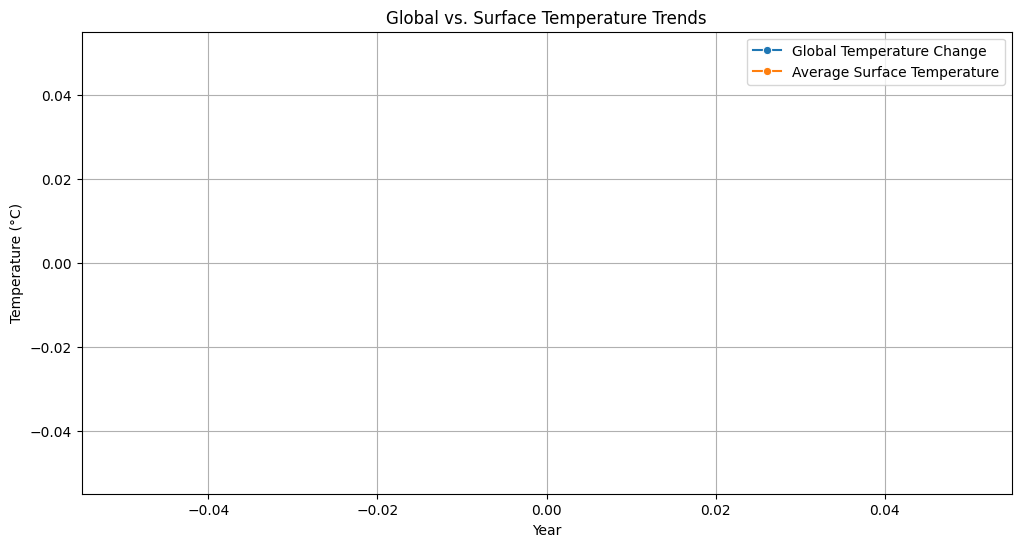

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_path1 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\all countries global temperature.csv"
file_path2 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\Average Surface Temperature.csv"

# Load datasets
df1 = pd.read_csv(file_path1, sep=';', encoding='latin1')
df2 = pd.read_csv(file_path2, encoding='latin1')

# Clean column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Print column names to check for inconsistencies
print("Columns in Dataset 1:", list(df1.columns))

# Identify potential 'Change' column
change_column = [col for col in df1.columns if 'change' in col.lower()]
if change_column:
    df1.rename(columns={change_column[0]: 'Change'}, inplace=True)

# Convert temperature change column to numeric if exists
if 'Change' in df1.columns:
    df1['Change'] = pd.to_numeric(df1['Change'], errors='coerce')

# Extract year columns from Dataset 1
years_df1 = [col for col in df1.columns if col.isdigit()]

df1_trends = df1[years_df1].mean(axis=0).reset_index()
df1_trends.columns = ['Year', 'Avg_Global_Change']
df1_trends['Year'] = pd.to_numeric(df1_trends['Year'])

# Process Dataset 2
if 'year' in df2.columns and 'Average surface temperature' in df2.columns:
    df2_yearly = df2.groupby('year')['Average surface temperature'].mean().reset_index()
    df2_yearly.rename(columns={'year': 'Year', 'Average surface temperature': 'Avg_Surface_Temp'}, inplace=True)

    # Convert Year column to numeric
    df2_yearly['Year'] = pd.to_numeric(df2_yearly['Year'])
    
    # Merge both datasets
    combined_df = pd.merge(df1_trends, df2_yearly, on='Year', how='inner')

    # Plot temperature trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=combined_df, x='Year', y='Avg_Global_Change', label='Global Temperature Change', marker='o')
    sns.lineplot(data=combined_df, x='Year', y='Avg_Surface_Temp', label='Average Surface Temperature', marker='o')
    plt.title('Global vs. Surface Temperature Trends')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()
    plt.show()

    # Save processed dataset
    combined_df.to_csv('processed_climate_data.csv', index=False)


In [197]:
print(combined_df.head())  # Check first few rows
print(combined_df.info())  # Check for NaNs or unexpected data types


Empty DataFrame
Columns: [Year, Avg_Global_Change, Avg_Surface_Temp]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               0 non-null      int64  
 1   Avg_Global_Change  0 non-null      float64
 2   Avg_Surface_Temp   0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 132.0 bytes
None


In [198]:
print(combined_df[['Avg_Global_Change', 'Avg_Surface_Temp']].describe())


       Avg_Global_Change  Avg_Surface_Temp
count                0.0               0.0
mean                 NaN               NaN
std                  NaN               NaN
min                  NaN               NaN
25%                  NaN               NaN
50%                  NaN               NaN
75%                  NaN               NaN
max                  NaN               NaN


In [199]:
df1 = pd.read_csv(file_path1, sep=';', encoding='latin1')

In [200]:
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')
combined_df = combined_df.dropna()  # Drop any invalid rows


In [201]:
print("Merged DataFrame shape:", combined_df.shape)


Merged DataFrame shape: (0, 3)


### Inspecting the dataset 


In [202]:
print("Years in df1_trends:", df1_trends['Year'].unique())
print("Years in df2_yearly:", df2_yearly['Year'].unique())


Years in df1_trends: []
Years in df2_yearly: [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024 2025]


In [203]:
df1_trends['Year'] = df1_trends['Year'].astype(int)
df2_yearly['Year'] = df2_yearly['Year'].astype(int)


In [204]:
df2_yearly = df2_yearly[df2_yearly['Year'].isin(df1_trends['Year'])]


In [205]:
combined_df = pd.merge(df1_trends, df2_yearly, on='Year', how='inner')
print("Merged DataFrame shape after fix:", combined_df.shape)


Merged DataFrame shape after fix: (0, 3)


In [206]:
print("Years in df1_trends:", df1_trends['Year'].unique())
print("Years in df2_yearly:", df2_yearly['Year'].unique())


Years in df1_trends: []
Years in df2_yearly: []


In [207]:
df1_trends['Year'] = df1_trends['Year'].astype(int)
df2_yearly['Year'] = df2_yearly['Year'].astype(int)


In [208]:
common_years = set(df1_trends['Year']).intersection(set(df2_yearly['Year']))
print("Common Years:", sorted(common_years))


Common Years: []


In [209]:
df1_trends = df1_trends[df1_trends['Year'].isin(df2_yearly['Year'])]
df2_yearly = df2_yearly[df2_yearly['Year'].isin(df1_trends['Year'])]


In [210]:
combined_df = pd.merge(df1_trends, df2_yearly, on='Year', how='inner')
print("Merged DataFrame shape after fix:", combined_df.shape)


Merged DataFrame shape after fix: (0, 3)


In [211]:
# Display basic information about the datasets
print("Dataset 1 Info:")
print(df1.info())
print("\nDataset 2 Info:")
print(df2.info())

# Display the first few rows of each dataset
print("\nDataset 1 Head:")
print(df1.head())
print("\nDataset 2 Head:")
print(df2.head())

# Check for missing values
print("\nMissing values in Dataset 1:")
print(df1.isnull().sum())
print("\nMissing values in Dataset 2:")
print(df2.isnull().sum())

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                     --------------  ----- 
 0   ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,200

### Summary Statistics

In [212]:
# Summary statistics for Dataset 1
print("Summary statistics for Dataset 1:")
print(df1.describe())

# Summary statistics for Dataset 2
print("\nSummary statistics for Dataset 2:")
print(df2.describe())

Summary statistics for Dataset 1:
       ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count                                                 227                                                                                                                                                                                                                                                       
unique                                                227                                                                                                                                                                                                                                                       
top     1,"Afghanistan, Islamic Rep. of",Degree Cel

### Visualizing the Data

In [213]:
print(df1.columns)


Index(['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021'], dtype='object')


In [214]:
df1.columns = df1.columns.str.strip()


In [215]:
print([col for col in df1.columns if 'change' in col.lower()])


['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021']


In [216]:
print(df1.head())

  ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0  1,"Afghanistan, Islamic Rep. of",Degree Celsiu...                                                                                                                                                                                                                                                       
1  2,Albania,Degree Celsius,Surface Temperature C...                                                                                                                                                                                                                                                       
2  3,Algeria,Degree Celsius,Surface Temperature C...                                                

In [217]:
df1.rename(columns={'Temperature Change': 'Change'}, inplace=True)


In [218]:
df1 = pd.read_csv(file_path1, sep=';', encoding='latin1')


In [219]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names (remove spaces and standardize)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Check if the 'Change' column exists in df1
print("\nAvailable columns in Dataset 1:", df1.columns)
print("\nColumns containing 'change':", [col for col in df1.columns if 'change' in col.lower()])

# If 'Change' is found under a different name, rename it
if 'Temperature Change' in df1.columns:
    df1.rename(columns={'Temperature Change': 'Change'}, inplace=True)

# Convert 'Change' column to numeric if found
if 'Change' in df1.columns:
    df1['Change'] = pd.to_numeric(df1['Change'], errors='coerce')

# ---------------------- VISUALIZATION ----------------------

# 3. Line Plot for Temperature Trends Over the Years
years = [col for col in df1.columns if col.isdigit()]  # Check for year columns
if years:
    temperature_trends = df1[years].mean(axis=0)
    plt.figure(figsize=(20, 8))
    sns.lineplot(x=years, y=temperature_trends)
    plt.title('Average Global Temperature Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.xticks(rotation=45)
    plt.show()


Available columns in Dataset 1: Index(['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021'], dtype='object')

Columns containing 'change': ['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021']


In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
file_path1 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\all countries global temperature.csv"
file_path2 = r"C:\Users\chris.mutuku\OneDrive - Skanem AS\Desktop\CAPSTONE PROJECT\Capstone-Project---Group-8\Data\Climate Change - datasets\Average Surface Temperature.csv"

# Load datasets
df1 = pd.read_csv(file_path1, sep=';', encoding='latin1')
df2 = pd.read_csv(file_path2, encoding='latin1')

# Clean column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Print column names to check for inconsistencies
print("Columns in Dataset 1:", list(df1.columns))

# Identify potential 'Change' column
change_column = [col for col in df1.columns if 'change' in col.lower()]
if change_column:
    df1.rename(columns={change_column[0]: 'Change'}, inplace=True)

# Convert temperature change column to numeric if exists
if 'Change' in df1.columns:
    df1['Change'] = pd.to_numeric(df1['Change'], errors='coerce')

# Transpose the dataset to get years as rows
df1_transposed = df1.set_index('Country Name').T

# Reset index and rename columns
df1_transposed = df1_transposed.reset_index().rename(columns={'index': 'Year'})

# Convert Year column to numeric
df1_transposed['Year'] = pd.to_numeric(df1_transposed['Year'], errors='coerce')

# Compute average global temperature change per year
df1_trends = df1_transposed.groupby('Year').mean().reset_index()
df1_trends.rename(columns={'Change': 'Avg_Global_Change'}, inplace=True)

# Process Dataset 2
if 'year' in df2.columns and 'Average surface temperature' in df2.columns:
    df2_yearly = df2.groupby('year')['Average surface temperature'].mean().reset_index()
    df2_yearly.rename(columns={'year': 'Year', 'Average surface temperature': 'Avg_Surface_Temp'}, inplace=True)

    # Convert Year column to numeric
    df2_yearly['Year'] = pd.to_numeric(df2_yearly['Year'])
    
    # Merge both datasets
    combined_df = pd.merge(df1_trends, df2_yearly, on='Year', how='inner')

    # Plot temperature trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=combined_df, x='Year', y='Avg_Global_Change', label='Global Temperature Change', marker='o')
    sns.lineplot(data=combined_df, x='Year', y='Avg_Surface_Temp', label='Average Surface Temperature', marker='o')
    plt.title('Global vs. Surface Temperature Trends')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid()
    plt.show()

    # Save processed dataset
    combined_df.to_csv('processed_climate_data.csv', index=False)

Columns in Dataset 1: ['ï»¿ObjectId,Country Name,Unit,Change ,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021']


KeyError: "None of ['Country Name'] are in the columns"